In [6]:
import numpy as np
import pandas as pd
import pyodbc 

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("2019_nCoV_data.csv")
Covid_Confirmed = pd.read_csv("time_series_19-covid-Confirmed.csv")
Covid_Deaths = pd.read_csv("time_series_19-covid-Deaths.csv")
Covid_Recovered = pd.read_csv("time_series_19-covid-Recovered.csv")
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0


In [12]:
data = data.astype({"Confirmed": int, "Deaths": int, "Recovered" : int})
data = data.filter(["Date", "Province/State", "Country", "Last Update", "Confirmed", "Deaths", "Recovered"])
data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0


In [13]:
#Convert the date (remove time stamp)

data['Date1'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date1'].dt.date
data['Last Update1'] = pd.to_datetime(data['Last Update'])
data['Last Update'] = data['Last Update1'].dt.date
data = data.filter(["Date", "Province/State", "Country", "Last Update", "Confirmed", "Deaths", "Recovered"])
data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,2020-01-22,1,0,0
1,2020-01-22,Beijing,China,2020-01-22,14,0,0
2,2020-01-22,Chongqing,China,2020-01-22,6,0,0
3,2020-01-22,Fujian,China,2020-01-22,1,0,0
4,2020-01-22,Gansu,China,2020-01-22,0,0,0


In [14]:
#Combine country and province to location and sum values pertaining to it

data['Location'] = data['Country'] + ', ' + data['Province/State'].fillna('N/A')

daily = pd.DataFrame(columns=data.columns)

for item in data['Location'].unique():
    a = data[data['Location']==item].set_index('Date')
    a = a.rename_axis('Date').reset_index()
    daily = daily.append(a, sort=False, ignore_index=True)

data_daily = daily.sort_values(['Date','Country','Province/State'])
data_daily = data_daily.reset_index()
data_daily = data_daily.filter(["Date", "Province/State", "Country", "Last Update", "Confirmed", "Deaths", "Recovered", "Location"])
data_daily.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Location
0,2020-01-22,Anhui,China,2020-01-22,1,0,0,"China, Anhui"
1,2020-01-22,Beijing,China,2020-01-22,14,0,0,"China, Beijing"
2,2020-01-22,Chongqing,China,2020-01-22,6,0,0,"China, Chongqing"
3,2020-01-22,Fujian,China,2020-01-22,1,0,0,"China, Fujian"
4,2020-01-22,Gansu,China,2020-01-22,0,0,0,"China, Gansu"


In [15]:
#For graph - Comparing the confirmed, deaths and recovered:

data_date = data_daily.filter(["Date",  "Confirmed", "Deaths", "Recovered"])
data_date = data_date.groupby(data_date["Date"]).sum()
data_date.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,0,0
2020-01-23,653,18,30
2020-01-24,941,26,36
2020-01-25,2019,56,49
2020-01-26,2794,80,54


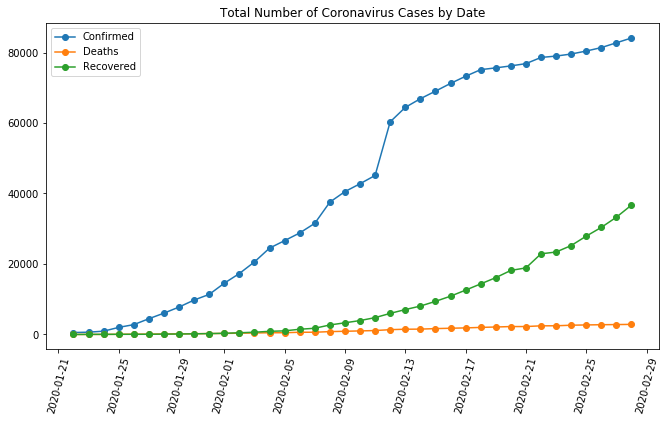

In [16]:
plt.figure(figsize=(11,6))
plt.plot(data_date, marker='o')
plt.title('Total Number of Coronavirus Cases bby Date')
plt.legend(data_date.columns)
plt.xticks(rotation=75)
plt.show()